# Topic: 開放資料 - 空氣品質指標(AQI)(歷史資料)

File: tutorial_air_quality_index.ipynb

Author: Ming-Chang Lee

Date: 2024.11.26

Data source: https://data.gov.tw/dataset/151824

References:

https://github.com/rwepa/python_data_scientist

# 大綱

1.商業理解

2.資料理解

    2.1 模組與資料匯入
    
    2.2 資料摘要
    
    2.3 探索性資料分析(Exploratory Data Analysis, EDA)
    
    2.4 資料視覺化
    
3.資料準備

4.建立模型

5.模型評估與測試

6.佈署應用與結論

參考文獻

# 1.商業理解

+ 研究目的: 探討空氣品質指標(AQI)(歷史資料)並進行資料視覺化分析.

+ 資料來源: 政府資料開放平台-空氣品質指標(AQI)(歷史資料)

+ 檔案下載: https://data.gov.tw/dataset/151824

+ 檔案名稱: aqx_p_488.csv

+ CSV檔案: https://github.com/rwepa/python_data_scientist/blob/main/tutorial_air_quality_index/aqx_p_488.csv

+ RAW下載: https://raw.githubusercontent.com/rwepa/python_data_scientist/refs/heads/main/tutorial_air_quality_index/aqx_p_488.csv

+ 欄位數量為25個:

 | 欄位名稱 | 中文說明 |
 | --------- | -------|
 | sitename | 測站名稱 | 
 | county | 縣市 | 
 | aqi | 空氣品質指標 |
 | pollutant | 空氣污染指標物 | 
 | status | 狀態 | 
 | so2 | 二氧化硫[ppb] | 
 | co | 一氧化碳[ppm] | 
 | o3 | 臭氧[ppb] | 
 | o3_8hr | 臭氧8小時移動平均[ppb] | 
 | pm10 | 懸浮微粒[μg/m3] | 
 | pm2.5 | 細懸浮微粒[μg/m3] | 
 | no2 | 二氧化氮[ppb] | 
 | nox | 氮氧化物[ppb] | 
 | no | 一氧化氮[ppb] | 
 | windspeed | 風速[m/sec] | 
 | winddirec | 風向[degrees] | 
 | datacreationdate | 資料發布時間 | 
 | unit | 單位 | 
 | co_8hr | 一氧化碳8小時移動平均[ppm] | 
 | pm2.5_avg | 細懸浮微粒移動平均值[μg/m3] | 
 | pm10_avg | 懸浮微粒移動平均值[μg/m3] | 
 | so2_avg | 二氧化硫移動平均值[ppb] | 
 | longitude | 經度 | 
 | latitude | 緯度 | 
 | siteid | 測站編號 | 

+ 資料筆數: 1000

+ 欄位包括地理變數等六大類別:

    1. 地理變數5個: 縣市、測站名稱、經度、緯度、測站編號
    2. 空氣品質數值資料9個: 空氣品質指標、二氧化硫[ppb]、一氧化碳[ppm]、臭氧[ppb]、懸浮微粒[μg/m3]、細懸浮微粒[μg/m3]、二氧化氮[ppb]、氮氧化物[ppb]、一氧化氮[ppb]
    3. 空氣品質數值資料(移動平均值)5個: 臭氧8小時移動平均[ppb]、一氧化碳8小時移動平均[ppm]、細懸浮微粒移動平均值[μg/m3]、懸浮微粒移動平均值[μg/m3]、二氧化硫移動平均值[ppb]
    4. 空氣品質類別資料3個: 空氣污染指標物、狀態、單位
    5. 大氣資料2個: 風速[m/sec]、風向[degrees]
    6. 日期時間資料1個: 資料發布時間

+ AQI: 

    + AQI(Air Quality Index)「空氣品質指標」就是整合過去空氣污染指標(PSI)及細懸浮微粒(PM2.5)指標。為使民眾易於掌握空氣品質狀況，並暸解其對健康之影響程度，由空氣品質監測站之空氣污染物濃度監測結果換算而得AQI值。
    + AQI值對應為5個類別: 0-50代表空氣品質良好(綠色)、51-100為普通(黃色)、101-150為對敏感族群不良(橘色)、151-200為對所有族群不良(紅色)、201-300為非常不良(紫色)、301-500為有害(褐紅)。</br>參考資料: https://www.dep.gov.taipei/News_Content.aspx?n=ACEFA960B5A4ACD7&sms=87415A8B9CE81B16&s=09364620174A483A

+ 空氣品質區:

台灣地區空氣品質監測網由環保署在民國七十九年著手規劃，八十二年九月正式運轉，目前全國監測站總數已增至七十七站。 因為空氣污染的流通具有流域性質，會跨越縣市界，因此環境部將台灣地區依地形、氣候、風向及污染擴散情形劃分為七大「空氣品質區」，分別為北部、竹苗、中部、雲嘉南、高屏、宜蘭、花東。另有3個離島地區，包括馬祖、金門與澎湖，本研究不考慮離島地區空氣品質。</br>參考資料: https://aqmc.kcg.gov.tw/</br>
    
    1.北部  : 基隆、台北、新北、桃園
    
    2.竹苗  : 新竹、苗栗
    
    3.中部  : 台中、彰化、南投
    
    4.雲嘉南: 雲林、嘉義、台南
    
    5.高屏  : 高雄、屏東
    
    6.花東  : 花蓮、台東
    
    7.宜蘭  : 宜蘭

空氣品質區參考圖:</br>空氣品質監測網: https://airtw.moenv.gov.tw/

<img src="https://github.com/rwepa/python_data_scientist/blob/main/tutorial_air_quality_index/aqi_area.png?raw=true" alt="aqi_area" width="500">

+ 空氣品質監測站依環境位置分為六類:</br>相關名詞定義: https://airtw.moenv.gov.tw/CHT/Encyclopedia/FAQ/relatednoun.aspx</br>112年空氣品質監測年報: https://www.moenv.gov.tw/Page/686030BBD5DFC8DD

1. A類: 一般空氣品質監測站 (Ambient air quality monitoring station): 設置於人口密集及可能發生高污染之地區；整體而言，在都市上風區佈設之站，可瞭解由其他地區所帶入污染物之情況，人口密度高地區佈設之站，則可瞭解大多數人於污染中之曝露狀態，而在都市下風區佈設之站，則以監測二次污染物（如臭氣）為主，本島57個，離島3個，合計60個。

2. B類: 背景空氣品質監測站 (Background air quality monitoring station): 設置於無人為污染地區之盛行風上風區，以監測其上風所挾帶之污染量。其佈設點均特別避開鄰近污染源之影響，以反映大尺度之空氣品質狀態，本島5個。

3. T類: 交通空氣品質監測站 (Traffic area air quality monitoring): 設置於交通流量頻繁之地區，以提供執行排氣控制效因評估，及反映行人曝露於車輛廢氣污染狀態之參考資訊，本島6個。

4. I類: 工業空氣品質監測站 (Industrial area air quality monitoring station): 設置於工業區之盛行風下風區，若顯著排放源之高度較低時，則佈設於緊鄰此區域下風邊緣，若屬高煙囪排放則設站於此區域下風數公里處，本島5個。

5. P類: 國家公園空氣品質監測站 (National park air quality monitoring station): 設置於國家公園內之適當地點，以長期監測此保護區內空氣品質現況及未來變化趨勢。佈設點均避開局部污染源，如道路或停車場，本島2個。

6. O類: 其他空氣品質監測站 (Other air quality monitoring station): 非上述類別之空氣品質監測站，本島2個。

# 2.資料理解

資料理解包括以下主題, 其中模組與資料匯入及資料摘要為必需主題:

+ 模組與資料匯入【必要項目】
+ 資料摘要【必要項目】
+ 探索性資料分析
+ 資料視覺化
+ 資料清理
+ 資料合併
+ 特徵選擇
+ 資料轉換

本研究使用 Python 程式語言(Python, 2024)並參考RWEPA網站(Lee, 2024)與Ashouri 等人(2023).

## 2.1 模組與資料匯入

In [1]:
# UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. 
# You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
# 本項設定須在執行 import numpy as np 之前
import os
os.environ["OMP_NUM_THREADS"] = "4"

In [2]:
# 載入檔案處理模組
import pandas as pd

# 載入科學計算模組
import numpy as np

# 載入機器學習-集群法模組
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import cluster

# 載入計算側影係數
from sklearn import metrics

# 載入繪圖模組
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from pandas.plotting import scatter_matrix

# 載入地理資料視覺化模組
import folium

In [3]:
# 讀取 AQI 資料集, 使用RAW下載方式直接匯入資料

urls = "https://raw.githubusercontent.com/rwepa/python_data_scientist/refs/heads/main/tutorial_air_quality_index/aqx_p_488.csv"
df_tmp = pd.read_csv(urls)

# 顯示資料
df_tmp # 1000*25

sitename county   aqi pollutant status  so2    co    o3  o3_8hr  pm10  \
0     屏東(枋山)    屏東縣  79.0     細懸浮微粒     普通  1.4  0.32  82.5    62.0  62.0   
1     宜蘭（頭城）    宜蘭縣  34.0       NaN     良好  0.0  0.14  38.0    37.9   7.0   
2     新北(樹林)    新北市  35.0       NaN     良好  0.5  0.33  19.8    21.9  12.0   
3     屏東（琉球）    屏東縣  93.0     細懸浮微粒     普通  1.2  0.34  71.3    47.7  63.0   
4     臺南（麻豆）    臺南市  55.0      懸浮微粒     普通  1.1  0.22  43.0    34.6  99.0   
..       ...    ...   ...       ...    ...  ...   ...   ...     ...   ...   
995       頭份    苗栗縣  32.0       NaN     良好  1.0  0.19  32.3    35.0   6.0   
996       新竹    新竹市  33.0       NaN     良好  1.1  0.21  30.5    36.0   6.0   
997       竹東    新竹縣  35.0       NaN     良好  0.5  0.15  36.0    38.3   4.0   
998       湖口    新竹縣  34.0       NaN     良好  0.7  0.18  35.4    37.4   9.0   
999       龍潭    桃園市  31.0       NaN     良好  0.7  0.22  29.7    34.6   7.0   

     ...  winddirec  datacreationdate  unit  co_8hr pm2.5_avg pm10_avg  \
0    ...        320  2024-11-21 16:00   NaN     0.3      26.7     53.0   
1    ...         53  2024-11-21 16:00   NaN     0.1       0.9      4.0   
2    ...        162  2024-11-21 16:00   NaN     0.2       2.7      7.0   
3    ...        319  2024-11-21 16:00   NaN     0.4      32.6     63.0   
4    ...          2  2024-11-21 16:00   NaN     0.2      13.2     55.0   
..   ...        ...               ...   ...     ...       ...      ...   
995  ...         36  2024-11-21 11:00   NaN     0.1       3.2      7.0   
996  ...         37  2024-11-21 11:00   NaN     0.1       2.1      7.0   
997  ...         37  2024-11-21 11:00   NaN     0.1       1.0      3.0   
998  ...         47  2024-11-21 11:00   NaN     0.1       3.4      7.0   
999  ...         56  2024-11-21 11:00   NaN     0.1       3.1      5.0   

    so2_avg   longitude   latitude  siteid  
0       0.0  120.651472  22.260899     313  
1       0.0  121.824639  24.853667     312  
2       0.0  121.383528  24.949028     311  
3       1.0  120.377220  22.352220     204  
4       0.0  120.245831  23.179047     203  
..      ...         ...        ...     ...  
995     1.0  120.898693  24.696907      25  
996     1.0  120.972368  24.805636      24  
997     0.0  121.088955  24.740914      23  
998     1.0  121.038869  24.900097      22  
999     0.0  121.216458  24.864000      21  

[1000 rows x 25 columns]

In [4]:
# 刪除 pollutant, unit, siteid 較無使用之變數
df = df_tmp.drop(['pollutant', 'unit', 'siteid'], axis=1)

# 顯示資料, 1000*22
df

sitename county   aqi status  so2    co    o3  o3_8hr  pm10  pm2.5  ...  \
0     屏東(枋山)    屏東縣  79.0     普通  1.4  0.32  82.5    62.0  62.0   31.0  ...   
1     宜蘭（頭城）    宜蘭縣  34.0     良好  0.0  0.14  38.0    37.9   7.0    0.0  ...   
2     新北(樹林)    新北市  35.0     良好  0.5  0.33  19.8    21.9  12.0    3.0  ...   
3     屏東（琉球）    屏東縣  93.0     普通  1.2  0.34  71.3    47.7  63.0   28.0  ...   
4     臺南（麻豆）    臺南市  55.0     普通  1.1  0.22  43.0    34.6  99.0   12.0  ...   
..       ...    ...   ...    ...  ...   ...   ...     ...   ...    ...  ...   
995       頭份    苗栗縣  32.0     良好  1.0  0.19  32.3    35.0   6.0    1.0  ...   
996       新竹    新竹市  33.0     良好  1.1  0.21  30.5    36.0   6.0    1.0  ...   
997       竹東    新竹縣  35.0     良好  0.5  0.15  36.0    38.3   4.0    2.0  ...   
998       湖口    新竹縣  34.0     良好  0.7  0.18  35.4    37.4   9.0    3.0  ...   
999       龍潭    桃園市  31.0     良好  0.7  0.22  29.7    34.6   7.0    3.0  ...   

      no  windspeed  winddirec  datacreationdate co_8hr pm2.5_avg  pm10_avg  \
0    0.4          1        320  2024-11-21 16:00    0.3      26.7      53.0   
1    0.6        1.2         53  2024-11-21 16:00    0.1       0.9       4.0   
2    5.8          0        162  2024-11-21 16:00    0.2       2.7       7.0   
3    0.8        2.9        319  2024-11-21 16:00    0.4      32.6      63.0   
4    1.2          3          2  2024-11-21 16:00    0.2      13.2      55.0   
..   ...        ...        ...               ...    ...       ...       ...   
995  2.1        3.4         36  2024-11-21 11:00    0.1       3.2       7.0   
996  1.5        3.3         37  2024-11-21 11:00    0.1       2.1       7.0   
997  1.2        6.3         37  2024-11-21 11:00    0.1       1.0       3.0   
998  1.6        6.3         47  2024-11-21 11:00    0.1       3.4       7.0   
999  2.3        4.4         56  2024-11-21 11:00    0.1       3.1       5.0   

     so2_avg   longitude   latitude  
0        0.0  120.651472  22.260899  
1        0.0  121.824639  24.853667  
2        0.0  121.383528  24.949028  
3        1.0  120.377220  22.352220  
4        0.0  120.245831  23.179047  
..       ...         ...        ...  
995      1.0  120.898693  24.696907  
996      1.0  120.972368  24.805636  
997      0.0  121.088955  24.740914  
998      1.0  121.038869  24.900097  
999      0.0  121.216458  24.864000  

[1000 rows x 22 columns]

<div class="alert alert-block alert-info">
<b>注意: </b>資料分析的心法中提及三大技巧: 1.群組 2.時間 3建立評變數。
</div>

## 2.2 資料摘要

In [5]:
# 欄位名稱
df.columns

Index(['sitename', 'county', 'aqi', 'status', 'so2', 'co', 'o3', 'o3_8hr',
       'pm10', 'pm2.5', 'no2', 'nox', 'no', 'windspeed', 'winddirec',
       'datacreationdate', 'co_8hr', 'pm2.5_avg', 'pm10_avg', 'so2_avg',
       'longitude', 'latitude'],
      dtype='object')

In [6]:
# 資料型態
df.dtypes # 變數包括 float64(實數)或 object (字串)

sitename             object
county               object
aqi                 float64
status               object
so2                 float64
co                  float64
o3                  float64
o3_8hr              float64
pm10                float64
pm2.5               float64
no2                 float64
nox                 float64
no                  float64
windspeed            object
winddirec            object
datacreationdate     object
co_8hr              float64
pm2.5_avg           float64
pm10_avg            float64
so2_avg             float64
longitude           float64
latitude            float64
dtype: object

In [7]:
# windspeed 變數資料中包括 '-'(23筆) 與''(17筆), 合計40筆.
# 因此匯入為 object 字串資料型態, 須先轉換為 nan, 再轉換為 float64 浮點數數值型態.
df['windspeed'] = df['windspeed'].replace(to_replace='-', value=np.nan)
df['windspeed'] = df['windspeed'].replace(to_replace='', value=np.nan)
df['windspeed'] = pd.to_numeric(df['windspeed'], errors = 'coerce')
df['windspeed'].isnull().sum()

40

In [8]:
# winddirec 變數資料中包括 '-'(23筆) 與''(17筆), 合計40筆.
# 因此匯入為 object 字串資料型態, 須先轉換為 nan, 再轉換為 float64 浮點數數值型態.
df['winddirec'] = df['winddirec'].replace(to_replace='-', value=np.nan)
df['winddirec'] = df['winddirec'].replace(to_replace='', value=np.nan)
df['winddirec'] = pd.to_numeric(df['winddirec'], errors = 'coerce')
df['winddirec'].isnull().sum()

40

In [9]:
# 刪除 NA
df.dropna(inplace=True)

# reset_index 重置索引為 [0, 1, 2,...,829]
df.reset_index(drop=True, inplace=True)

df # 830*22

sitename county   aqi status  so2    co    o3  o3_8hr  pm10  pm2.5  ...  \
0     屏東(枋山)    屏東縣  79.0     普通  1.4  0.32  82.5    62.0  62.0   31.0  ...   
1     宜蘭（頭城）    宜蘭縣  34.0     良好  0.0  0.14  38.0    37.9   7.0    0.0  ...   
2     新北(樹林)    新北市  35.0     良好  0.5  0.33  19.8    21.9  12.0    3.0  ...   
3     屏東（琉球）    屏東縣  93.0     普通  1.2  0.34  71.3    47.7  63.0   28.0  ...   
4     臺南（麻豆）    臺南市  55.0     普通  1.1  0.22  43.0    34.6  99.0   12.0  ...   
..       ...    ...   ...    ...  ...   ...   ...     ...   ...    ...  ...   
825       頭份    苗栗縣  32.0     良好  1.0  0.19  32.3    35.0   6.0    1.0  ...   
826       新竹    新竹市  33.0     良好  1.1  0.21  30.5    36.0   6.0    1.0  ...   
827       竹東    新竹縣  35.0     良好  0.5  0.15  36.0    38.3   4.0    2.0  ...   
828       湖口    新竹縣  34.0     良好  0.7  0.18  35.4    37.4   9.0    3.0  ...   
829       龍潭    桃園市  31.0     良好  0.7  0.22  29.7    34.6   7.0    3.0  ...   

      no  windspeed  winddirec  datacreationdate  co_8hr pm2.5_avg  pm10_avg  \
0    0.4        1.0      320.0  2024-11-21 16:00     0.3      26.7      53.0   
1    0.6        1.2       53.0  2024-11-21 16:00     0.1       0.9       4.0   
2    5.8        0.0      162.0  2024-11-21 16:00     0.2       2.7       7.0   
3    0.8        2.9      319.0  2024-11-21 16:00     0.4      32.6      63.0   
4    1.2        3.0        2.0  2024-11-21 16:00     0.2      13.2      55.0   
..   ...        ...        ...               ...     ...       ...       ...   
825  2.1        3.4       36.0  2024-11-21 11:00     0.1       3.2       7.0   
826  1.5        3.3       37.0  2024-11-21 11:00     0.1       2.1       7.0   
827  1.2        6.3       37.0  2024-11-21 11:00     0.1       1.0       3.0   
828  1.6        6.3       47.0  2024-11-21 11:00     0.1       3.4       7.0   
829  2.3        4.4       56.0  2024-11-21 11:00     0.1       3.1       5.0   

     so2_avg   longitude   latitude  
0        0.0  120.651472  22.260899  
1        0.0  121.824639  24.853667  
2        0.0  121.383528  24.949028  
3        1.0  120.377220  22.352220  
4        0.0  120.245831  23.179047  
..       ...         ...        ...  
825      1.0  120.898693  24.696907  
826      1.0  120.972368  24.805636  
827      0.0  121.088955  24.740914  
828      1.0  121.038869  24.900097  
829      0.0  121.216458  24.864000  

[830 rows x 22 columns]

In [10]:
# 資料摘要
# aqi 最小值為 16.00, 最大值為 123.00, 平均值為 45.58, 中位數為 34.50
pd.set_option('display.precision', 2)
df.describe(include='all')

sitename county     aqi status     so2      co      o3  o3_8hr    pm10  \
count       830    830  830.00    830  830.00  830.00  830.00  830.00  830.00   
unique       80     22     NaN      3     NaN     NaN     NaN     NaN     NaN   
top      屏東(枋山)    高雄市     NaN     良好     NaN     NaN     NaN     NaN     NaN   
freq         12    133     NaN    617     NaN     NaN     NaN     NaN     NaN   
mean        NaN    NaN   45.58    NaN    1.25    0.26   39.98   31.18   30.06   
std         NaN    NaN   24.44    NaN    1.00    0.12   14.96    8.75   36.68   
min         NaN    NaN   16.00    NaN    0.00    0.12    6.20    7.20    0.00   
25%         NaN    NaN   30.00    NaN    0.70    0.19   30.20   26.20    8.00   
50%         NaN    NaN   34.50    NaN    1.10    0.23   37.00   31.70   18.00   
75%         NaN    NaN   51.00    NaN    1.50    0.30   46.20   36.60   45.00   
max         NaN    NaN  123.00    NaN   10.20    0.84  123.90   62.00  386.00   

         pm2.5  ...      no  windspeed  winddirec  datacreationdate  co_8hr  \
count   830.00  ...  830.00     830.00     830.00               830  830.00   
unique     NaN  ...     NaN        NaN        NaN                 6     NaN   
top        NaN  ...     NaN        NaN        NaN  2024-11-21 14:00     NaN   
freq       NaN  ...     NaN        NaN        NaN               143     NaN   
mean     12.49  ...    2.47       3.35     147.55               NaN    0.22   
std      13.42  ...    2.69       2.35     134.45               NaN    0.13   
min       0.00  ...    0.00       0.00       0.00               NaN    0.10   
25%       3.00  ...    1.10       1.70      32.00               NaN    0.10   
50%       7.00  ...    1.80       2.60      77.00               NaN    0.20   
75%      17.00  ...    2.80       4.20     300.00               NaN    0.30   
max      74.00  ...   22.20      11.30     360.00               NaN    0.70   

       pm2.5_avg  pm10_avg  so2_avg  longitude  latitude  
count     830.00    830.00   830.00     830.00    830.00  
unique       NaN       NaN      NaN        NaN       NaN  
top          NaN       NaN      NaN        NaN       NaN  
freq         NaN       NaN      NaN        NaN       NaN  
mean       10.81     22.78     0.70     120.79     23.97  
std        10.92     21.11     0.69       0.62      1.00  
min         0.10      1.00     0.00     118.31     21.96  
25%         3.20      6.00     0.00     120.35     22.99  
50%         5.40     15.00     1.00     120.65     24.07  
75%        14.90     35.00     1.00     121.37     24.95  
max        44.00    154.00     3.00     121.82     26.15  

[11 rows x 22 columns]

## 2.3 探索性資料分析(Exploratory Data Analysis, EDA)

In [11]:
# 資料列數與行數 (830, 22)
df.shape

(830, 22)

In [12]:
# isnull 顯示資料沒有遺漏值 (Missing Values)
df.isnull().sum()

sitename            0
county              0
aqi                 0
status              0
so2                 0
co                  0
o3                  0
o3_8hr              0
pm10                0
pm2.5               0
no2                 0
nox                 0
no                  0
windspeed           0
winddirec           0
datacreationdate    0
co_8hr              0
pm2.5_avg           0
pm10_avg            0
so2_avg             0
longitude           0
latitude            0
dtype: int64

In [13]:
# 資料型態: windspeed, winddirec 已經正確轉換為 float64.
df.dtypes

sitename             object
county               object
aqi                 float64
status               object
so2                 float64
co                  float64
o3                  float64
o3_8hr              float64
pm10                float64
pm2.5               float64
no2                 float64
nox                 float64
no                  float64
windspeed           float64
winddirec           float64
datacreationdate     object
co_8hr              float64
pm2.5_avg           float64
pm10_avg            float64
so2_avg             float64
longitude           float64
latitude            float64
dtype: object

In [14]:
# 顯示前5筆
df.head()

sitename county   aqi status  so2    co    o3  o3_8hr  pm10  pm2.5  ...  \
0   屏東(枋山)    屏東縣  79.0     普通  1.4  0.32  82.5    62.0  62.0   31.0  ...   
1   宜蘭（頭城）    宜蘭縣  34.0     良好  0.0  0.14  38.0    37.9   7.0    0.0  ...   
2   新北(樹林)    新北市  35.0     良好  0.5  0.33  19.8    21.9  12.0    3.0  ...   
3   屏東（琉球）    屏東縣  93.0     普通  1.2  0.34  71.3    47.7  63.0   28.0  ...   
4   臺南（麻豆）    臺南市  55.0     普通  1.1  0.22  43.0    34.6  99.0   12.0  ...   

    no  windspeed  winddirec  datacreationdate  co_8hr pm2.5_avg  pm10_avg  \
0  0.4        1.0      320.0  2024-11-21 16:00     0.3      26.7      53.0   
1  0.6        1.2       53.0  2024-11-21 16:00     0.1       0.9       4.0   
2  5.8        0.0      162.0  2024-11-21 16:00     0.2       2.7       7.0   
3  0.8        2.9      319.0  2024-11-21 16:00     0.4      32.6      63.0   
4  1.2        3.0        2.0  2024-11-21 16:00     0.2      13.2      55.0   

   so2_avg  longitude  latitude  
0      0.0     120.65     22.26  
1      0.0     121.82     24.85  
2      0.0     121.38     24.95  
3      1.0     120.38     22.35  
4      0.0     120.25     23.18  

[5 rows x 22 columns]

In [15]:
# 顯示後5筆
df.tail()

sitename county   aqi status  so2    co    o3  o3_8hr  pm10  pm2.5  ...  \
825       頭份    苗栗縣  32.0     良好  1.0  0.19  32.3    35.0   6.0    1.0  ...   
826       新竹    新竹市  33.0     良好  1.1  0.21  30.5    36.0   6.0    1.0  ...   
827       竹東    新竹縣  35.0     良好  0.5  0.15  36.0    38.3   4.0    2.0  ...   
828       湖口    新竹縣  34.0     良好  0.7  0.18  35.4    37.4   9.0    3.0  ...   
829       龍潭    桃園市  31.0     良好  0.7  0.22  29.7    34.6   7.0    3.0  ...   

      no  windspeed  winddirec  datacreationdate  co_8hr pm2.5_avg  pm10_avg  \
825  2.1        3.4       36.0  2024-11-21 11:00     0.1       3.2       7.0   
826  1.5        3.3       37.0  2024-11-21 11:00     0.1       2.1       7.0   
827  1.2        6.3       37.0  2024-11-21 11:00     0.1       1.0       3.0   
828  1.6        6.3       47.0  2024-11-21 11:00     0.1       3.4       7.0   
829  2.3        4.4       56.0  2024-11-21 11:00     0.1       3.1       5.0   

     so2_avg  longitude  latitude  
825      1.0     120.90     24.70  
826      1.0     120.97     24.81  
827      0.0     121.09     24.74  
828      1.0     121.04     24.90  
829      0.0     121.22     24.86  

[5 rows x 22 columns]

## 2.4 資料視覺化

**相關係數矩陣(correlation coefficient matrix)**

In [16]:
# 篩選數值變數
df_numerics = df.drop(['sitename', 'county', 'status', 'datacreationdate'], axis=1)
df_numerics # 830*18

aqi  so2    co    o3  o3_8hr  pm10  pm2.5   no2   nox   no  windspeed  \
0    79.0  1.4  0.32  82.5    62.0  62.0   31.0   8.2   8.6  0.4        1.0   
1    34.0  0.0  0.14  38.0    37.9   7.0    0.0   4.7   5.3  0.6        1.2   
2    35.0  0.5  0.33  19.8    21.9  12.0    3.0  21.9  27.7  5.8        0.0   
3    93.0  1.2  0.34  71.3    47.7  63.0   28.0   7.2   8.0  0.8        2.9   
4    55.0  1.1  0.22  43.0    34.6  99.0   12.0   7.0   8.2  1.2        3.0   
..    ...  ...   ...   ...     ...   ...    ...   ...   ...  ...        ...   
825  32.0  1.0  0.19  32.3    35.0   6.0    1.0   8.8  10.9  2.1        3.4   
826  33.0  1.1  0.21  30.5    36.0   6.0    1.0  11.5  13.0  1.5        3.3   
827  35.0  0.5  0.15  36.0    38.3   4.0    2.0   4.7   6.0  1.2        6.3   
828  34.0  0.7  0.18  35.4    37.4   9.0    3.0   6.7   8.4  1.6        6.3   
829  31.0  0.7  0.22  29.7    34.6   7.0    3.0  10.9  13.2  2.3        4.4   

     winddirec  co_8hr  pm2.5_avg  pm10_avg  so2_avg  longitude  latitude  
0        320.0     0.3       26.7      53.0      0.0     120.65     22.26  
1         53.0     0.1        0.9       4.0      0.0     121.82     24.85  
2        162.0     0.2        2.7       7.0      0.0     121.38     24.95  
3        319.0     0.4       32.6      63.0      1.0     120.38     22.35  
4          2.0     0.2       13.2      55.0      0.0     120.25     23.18  
..         ...     ...        ...       ...      ...        ...       ...  
825       36.0     0.1        3.2       7.0      1.0     120.90     24.70  
826       37.0     0.1        2.1       7.0      1.0     120.97     24.81  
827       37.0     0.1        1.0       3.0      0.0     121.09     24.74  
828       47.0     0.1        3.4       7.0      1.0     121.04     24.90  
829       56.0     0.1        3.1       5.0      0.0     121.22     24.86  

[830 rows x 18 columns]

In [17]:
# 計算相關係數
correlation = df_numerics.corr()
correlation

aqi   so2    co        o3  o3_8hr  pm10  pm2.5   no2       nox  \
aqi        1.00  0.50  0.67  7.62e-01    0.06  0.66   0.92  0.32  2.18e-01   
so2        0.50  1.00  0.61  3.70e-01   -0.20  0.42   0.61  0.33  2.69e-01   
co         0.67  0.61  1.00  3.25e-01   -0.43  0.34   0.77  0.74  6.87e-01   
o3         0.76  0.37  0.32  1.00e+00    0.42  0.42   0.71 -0.13 -2.38e-01   
o3_8hr     0.06 -0.20 -0.43  4.25e-01    1.00  0.04  -0.17 -0.51 -5.56e-01   
pm10       0.66  0.42  0.34  4.25e-01    0.04  1.00   0.59  0.09  3.94e-02   
pm2.5      0.92  0.61  0.77  7.08e-01   -0.17  0.59   1.00  0.40  3.00e-01   
no2        0.32  0.33  0.74 -1.27e-01   -0.51  0.09   0.40  1.00  9.66e-01   
nox        0.22  0.27  0.69 -2.38e-01   -0.56  0.04   0.30  0.97  1.00e+00   
no        -0.09  0.04  0.37 -4.29e-01   -0.50 -0.09  -0.03  0.61  7.99e-01   
windspeed -0.23 -0.14 -0.48  6.14e-03    0.42 -0.07  -0.30 -0.51 -4.73e-01   
winddirec  0.45  0.29  0.34  4.11e-01   -0.11  0.36   0.50  0.11  6.54e-02   
co_8hr     0.76  0.40  0.83  4.72e-01   -0.28  0.36   0.77  0.61  5.35e-01   
pm2.5_avg  0.94  0.53  0.72  7.49e-01   -0.08  0.55   0.96  0.36  2.54e-01   
pm10_avg   0.88  0.52  0.53  6.68e-01    0.03  0.89   0.82  0.17  8.51e-02   
so2_avg    0.46  0.64  0.43  3.84e-01   -0.17  0.33   0.52  0.18  1.06e-01   
longitude -0.35 -0.37 -0.25 -3.19e-01    0.18 -0.39  -0.46  0.05  6.96e-02   
latitude  -0.69 -0.51 -0.46 -6.72e-01    0.05 -0.51  -0.73 -0.06 -3.45e-03   

             no  windspeed  winddirec  co_8hr  pm2.5_avg  pm10_avg  so2_avg  \
aqi       -0.09  -2.32e-01       0.45    0.76       0.94      0.88     0.46   
so2        0.04  -1.37e-01       0.29    0.40       0.53      0.52     0.64   
co         0.37  -4.79e-01       0.34    0.83       0.72      0.53     0.43   
o3        -0.43   6.14e-03       0.41    0.47       0.75      0.67     0.38   
o3_8hr    -0.50   4.22e-01      -0.11   -0.28      -0.08      0.03    -0.17   
pm10      -0.09  -6.99e-02       0.36    0.36       0.55      0.89     0.33   
pm2.5     -0.03  -2.96e-01       0.50    0.77       0.96      0.82     0.52   
no2        0.61  -5.10e-01       0.11    0.61       0.36      0.17     0.18   
nox        0.80  -4.73e-01       0.07    0.53       0.25      0.09     0.11   
no         1.00  -2.53e-01      -0.06    0.22      -0.07     -0.13    -0.09   
windspeed -0.25   1.00e+00      -0.37   -0.48      -0.28     -0.11    -0.07   
winddirec -0.06  -3.70e-01       1.00    0.42       0.52      0.48     0.32   
co_8hr     0.22  -4.83e-01       0.42    1.00       0.81      0.60     0.45   
pm2.5_avg -0.07  -2.82e-01       0.52    0.81       1.00      0.83     0.55   
pm10_avg  -0.13  -1.09e-01       0.48    0.60       0.83      1.00     0.49   
so2_avg   -0.09  -6.91e-02       0.32    0.45       0.55      0.49     1.00   
longitude  0.09  -1.28e-01      -0.33   -0.28      -0.48     -0.50    -0.51   
latitude   0.13   7.89e-02      -0.42   -0.53      -0.74     -0.72    -0.54   

           longitude  latitude  
aqi            -0.35 -6.87e-01  
so2            -0.37 -5.12e-01  
co             -0.25 -4.59e-01  
o3             -0.32 -6.72e-01  
o3_8hr          0.18  5.12e-02  
pm10           -0.39 -5.13e-01  
pm2.5          -0.46 -7.26e-01  
no2             0.05 -5.83e-02  
nox             0.07 -3.45e-03  
no              0.09  1.25e-01  
windspeed      -0.13  7.89e-02  
winddirec      -0.33 -4.22e-01  
co_8hr         -0.28 -5.29e-01  
pm2.5_avg      -0.48 -7.42e-01  
pm10_avg       -0.50 -7.21e-01  
so2_avg        -0.51 -5.41e-01  
longitude       1.00  5.55e-01  
latitude        0.56  1.00e+00

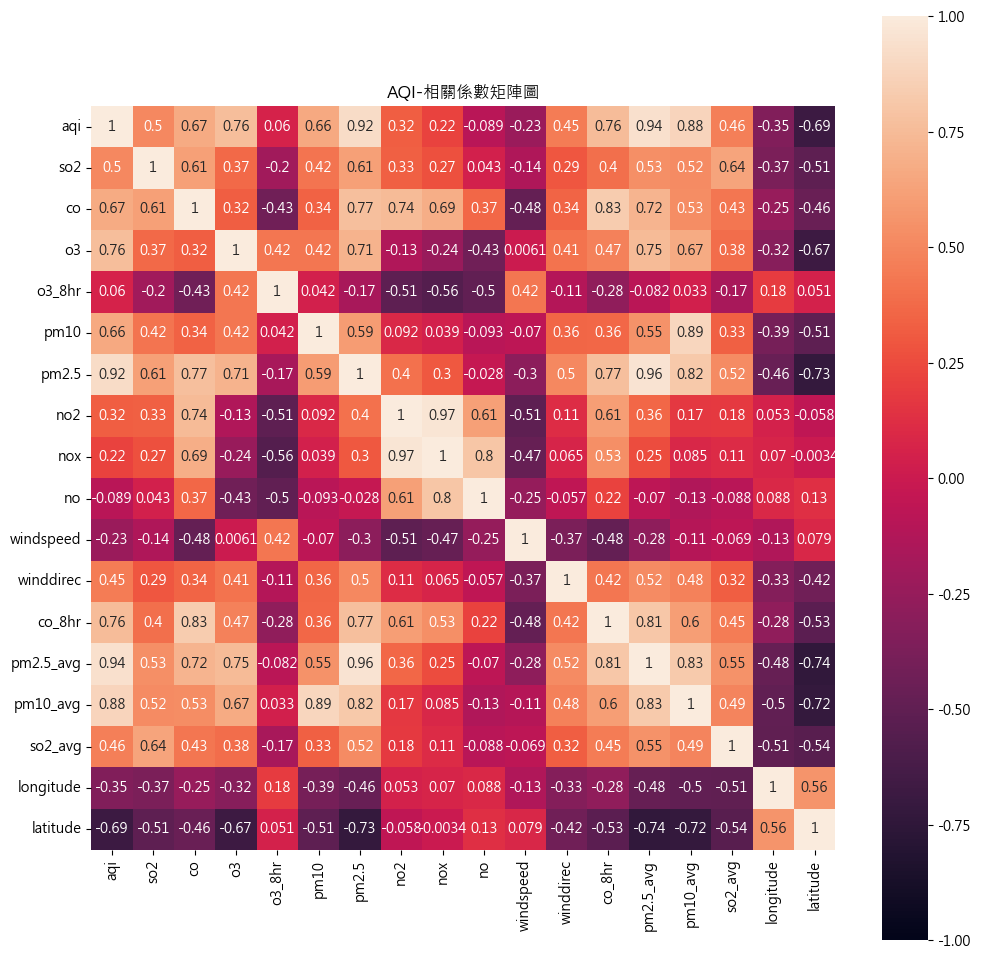

In [18]:
# 設定繪圖包括中文字型
import matplotlib

# 設定 matplotlib.rc 方法
matplotlib.rc('font', family='Microsoft JhengHei')

# 設定負號正確顯示
matplotlib.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(12, 12)) # 設定繪圖大小
plt.title('AQI-相關係數矩陣圖') # 建立標題
sns.color_palette("Spectral", as_cmap=True) # 設定顏色調色盤
sns.heatmap(correlation, vmax=1, vmin=-1, square=True,annot=True) # 繪製相關係數矩陣圖
plt.show() # 顯示繪圖結果

上方相關係數圖顯示以下之特質:

+ 說明相關係數之整體結果.
+ 結果顯示 aqi 與 pm2.5_avg 為正相關達最高值 0.94.
+ 結果顯示 ...

**散佈圖矩陣(scatter plot matrix)-使用 seaborn**

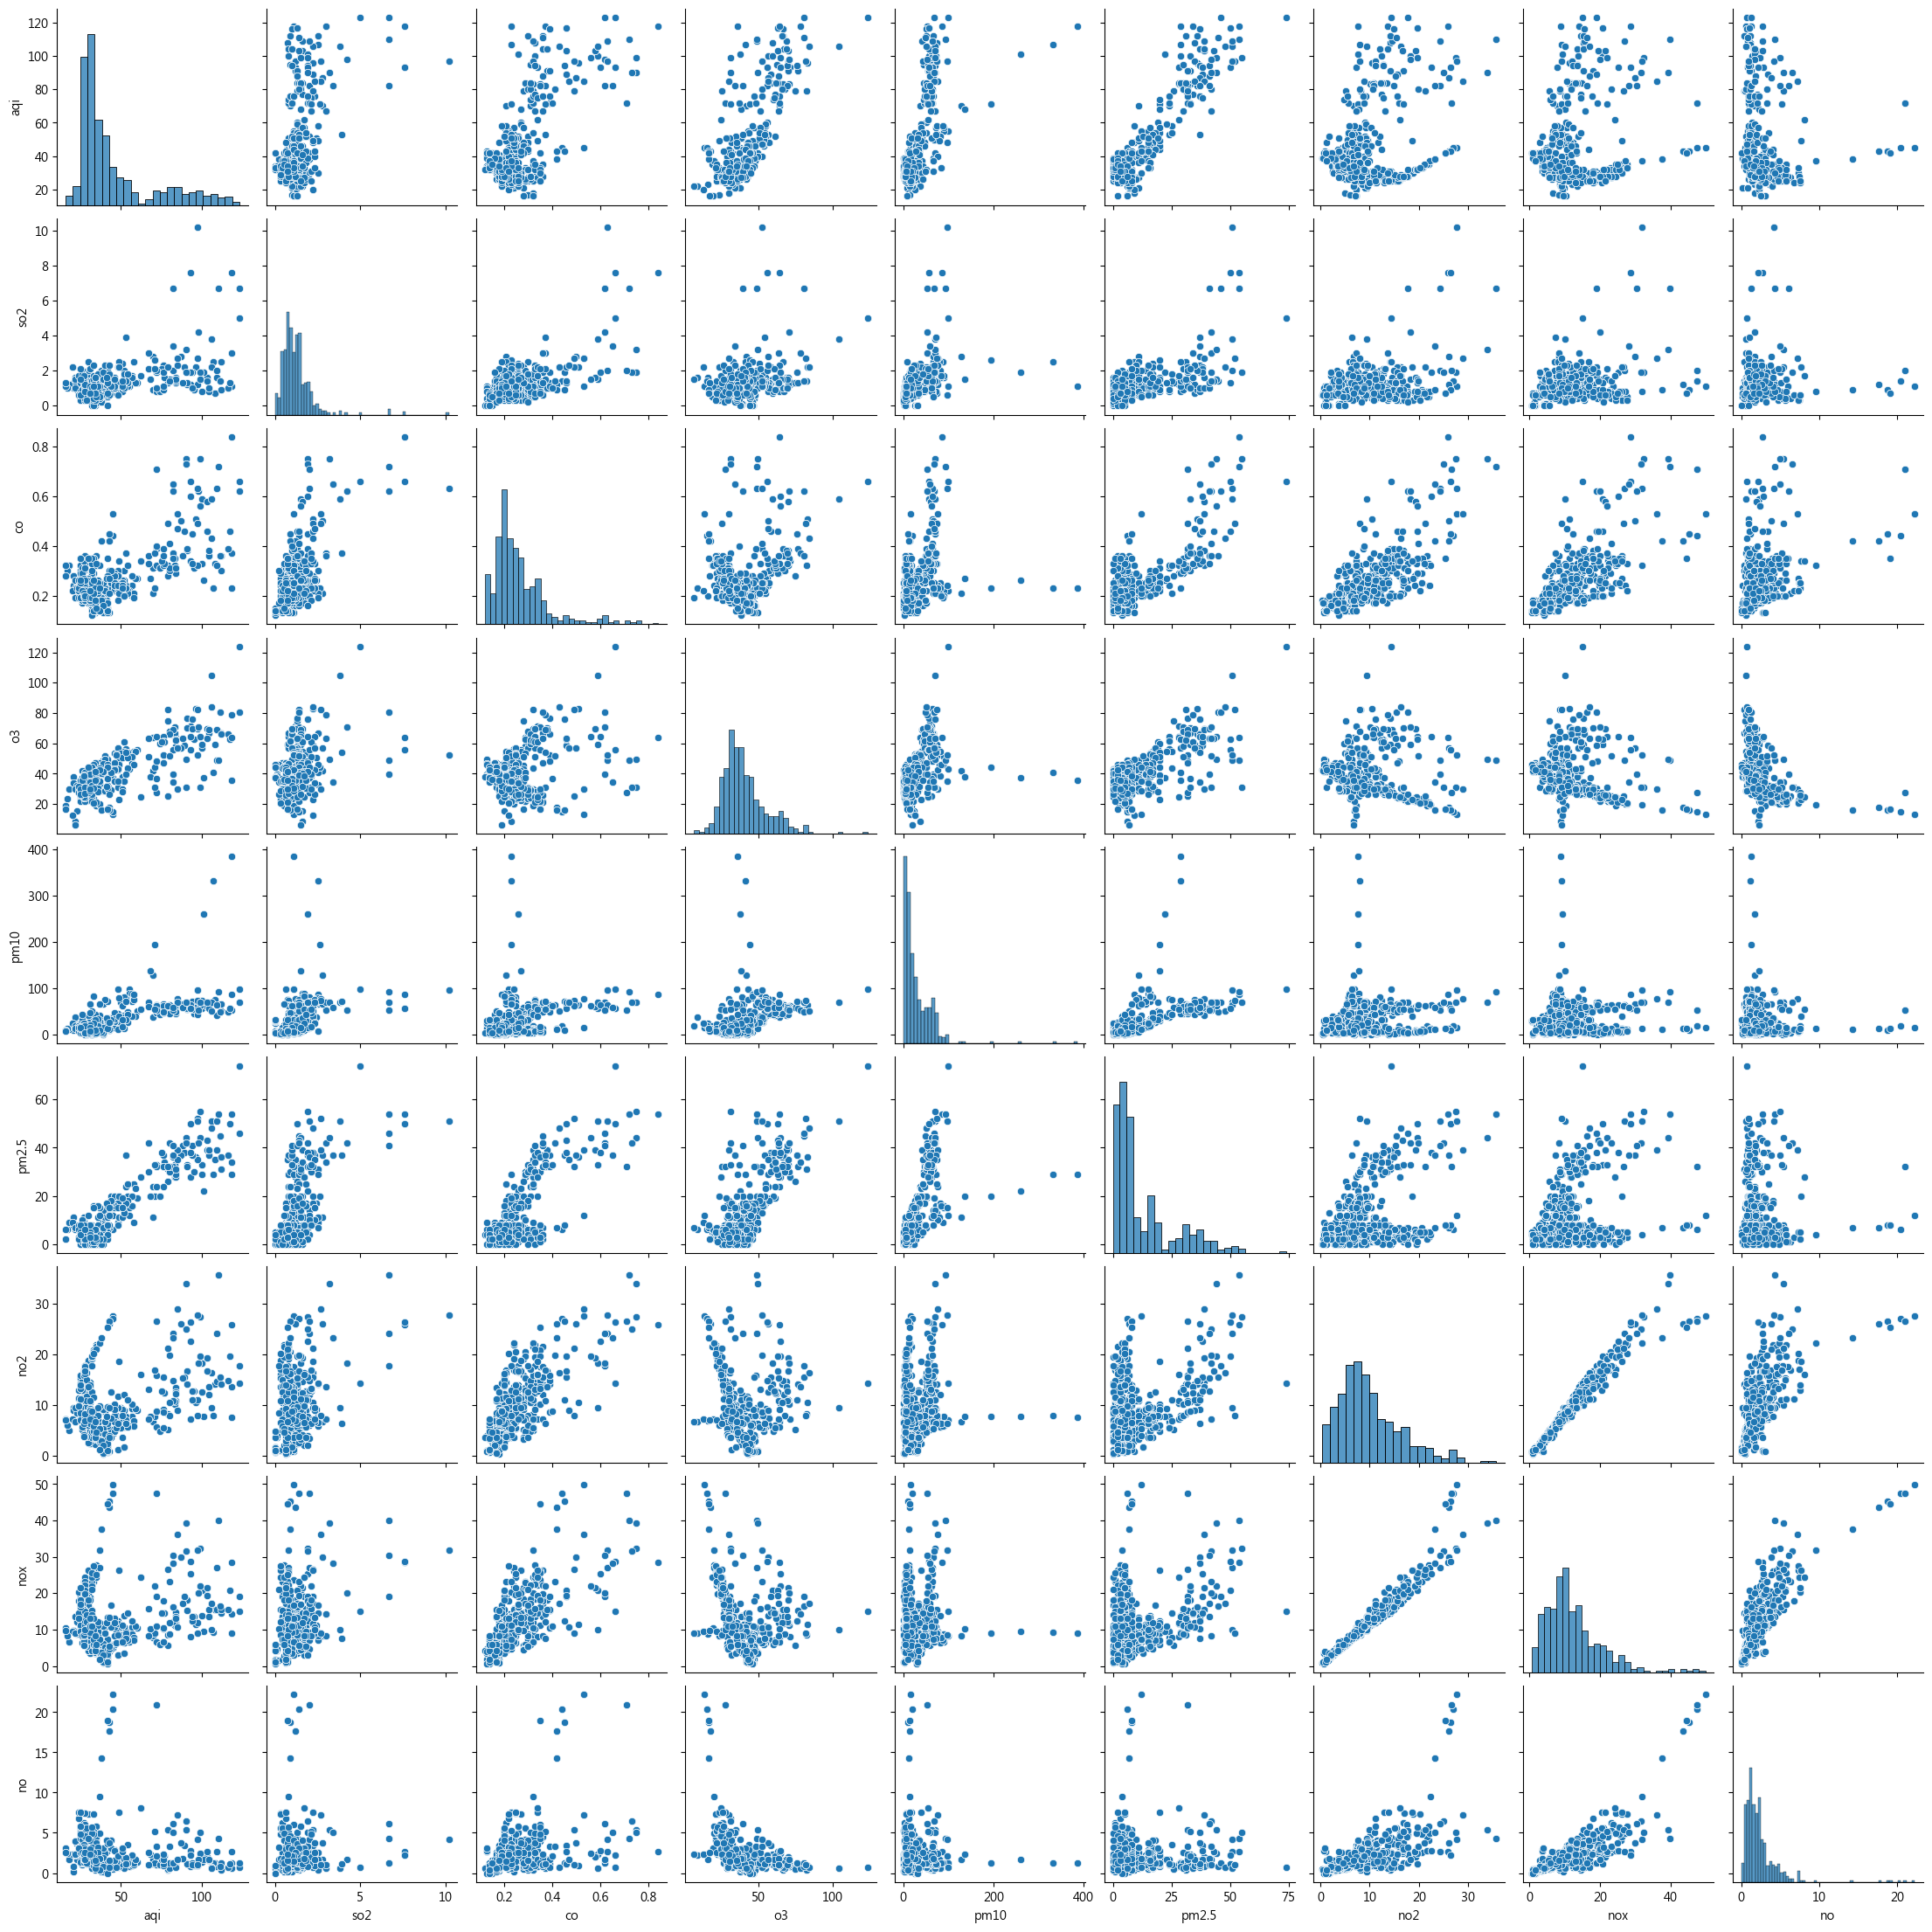

In [19]:
# 因數值資料包括18個變數, 資料量較大, 直接繪圖可能須較長時間.
# 因此將資料區分為2大部份, 第一部份為不包含 8hr與avg等資料, 第二部分為包括8hr與avg等資料.

df_numerics_aqi = df_numerics.loc[:,['aqi', 'so2', 'co', 'o3', 'pm10', 'pm2.5', 'no2', 'nox', 'no']]
sns.pairplot(df_numerics_aqi)
sns.set_theme(font_scale=1)
plt.show()

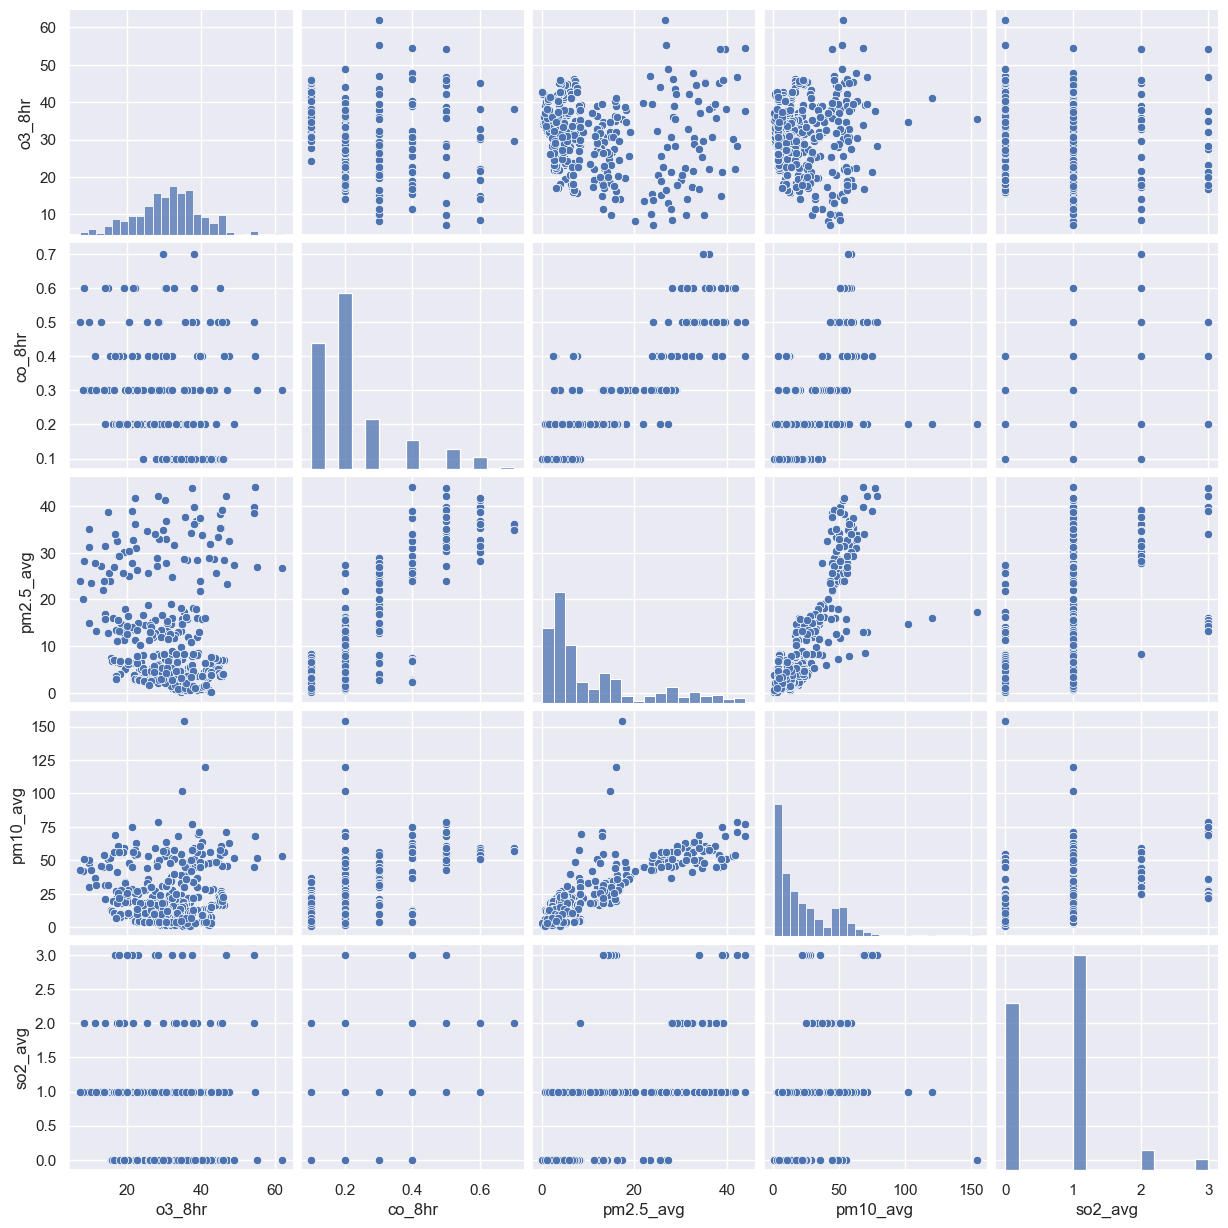

In [20]:
# 第二部分為包括8hr與avg等資料.

df_numerics_hr = df_numerics.loc[:,['o3_8hr', 'co_8hr', 'pm2.5_avg', 'pm10_avg', 'so2_avg']]
sns.pairplot(df_numerics_hr)
sns.set_theme(font_scale=1)
plt.show()

上方散佈圖矩陣顯示以下之特質:

+ 直方圖顯示明顯不是常態分配。
+ ...

**散佈圖矩陣(scatter plot matrix)-使用 pandas**

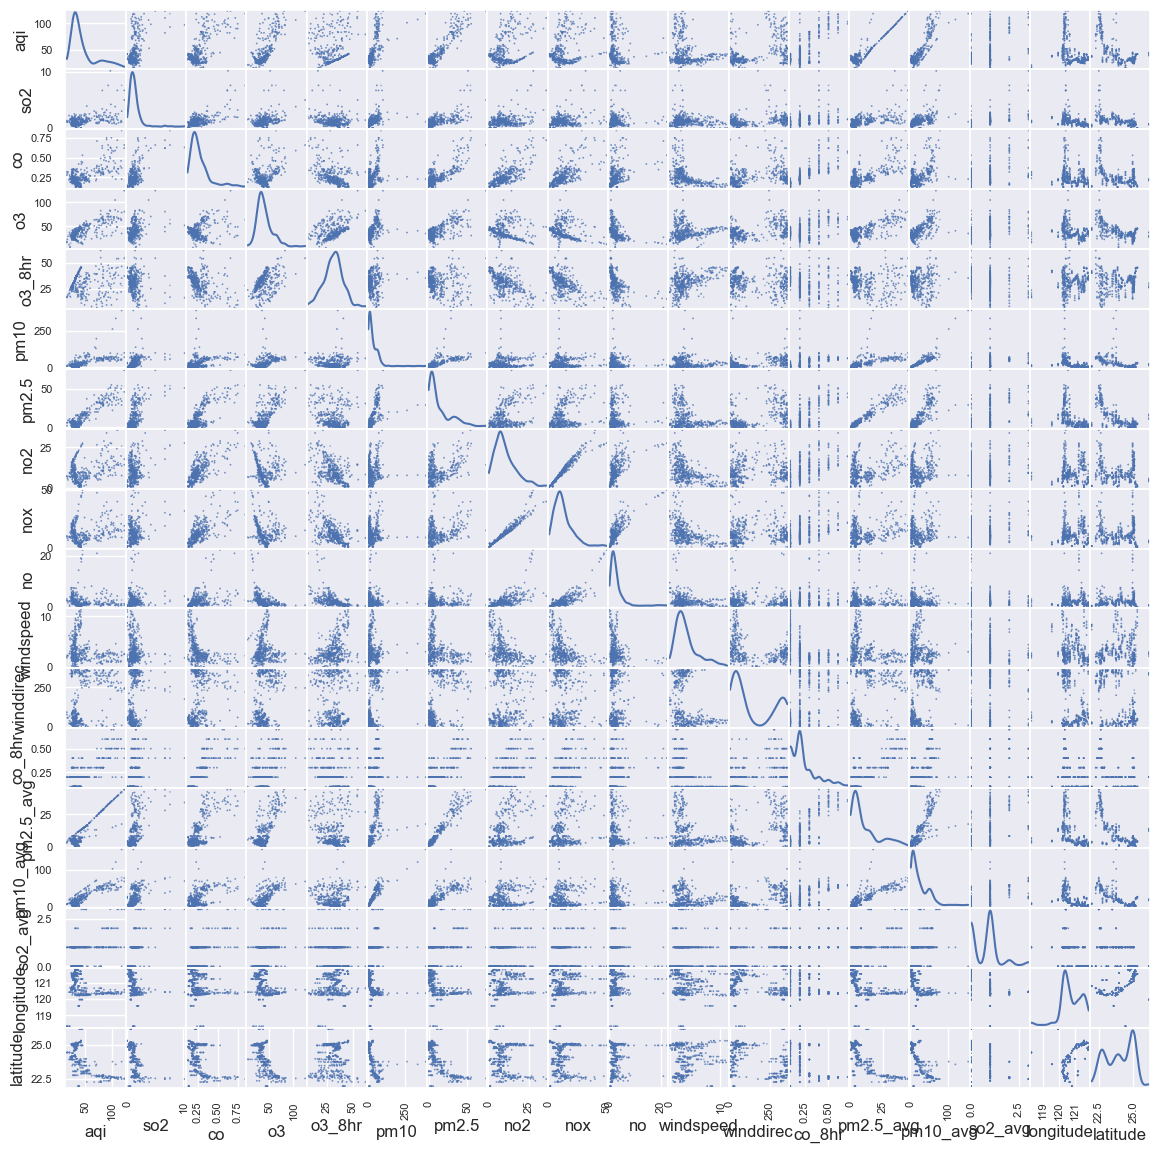

In [21]:
# scatter_matrix(df_numerics, figsize=(12, 12), fontsize=20, diagonal='kde', s=10)
scatter_matrix(df_numerics, figsize=(14, 14), diagonal='kde', s=6)
plt.show()
# 散佈圖矩陣之說明參考使用 seaborn 之結果.

**縣市AQI盒鬚圖**

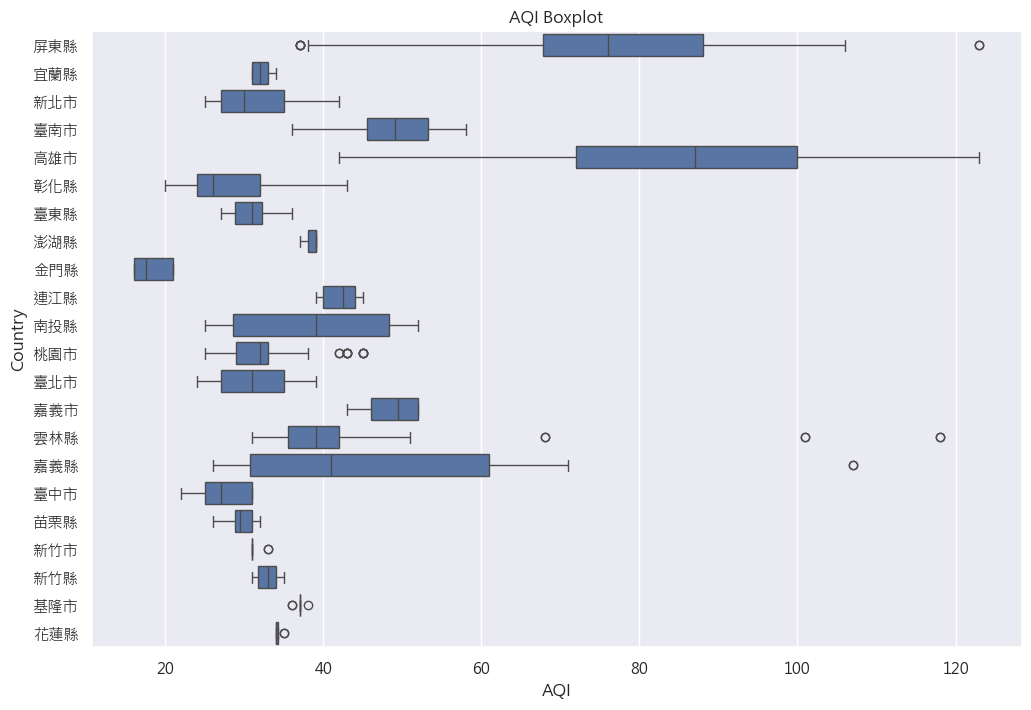

In [22]:
# 設定繪圖包括中文字型
import matplotlib

# 設定 matplotlib.rc 方法
matplotlib.rc('font', family='Microsoft JhengHei')

# 設定負號正確顯示
matplotlib.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(12, 8))
sns.boxplot(x="aqi", y="county", data=df).set(title='AQI Boxplot', xlabel='AQI', ylabel='Country')
plt.show()

上方縣市AQI盒鬚圖顯示以下之特質:

+ 屏東縣具有較大的離群值
+ 台中市具有較大的離群值
+ 中位數最大者為高雄市
+ ...

In [23]:
# 數值資料的變數平均值
df_numerics.mean()

aqi           45.58
so2            1.25
co             0.26
o3            39.98
o3_8hr        31.18
pm10          30.06
pm2.5         12.49
no2            9.97
nox           12.49
no             2.47
windspeed      3.35
winddirec    147.55
co_8hr         0.22
pm2.5_avg     10.81
pm10_avg      22.78
so2_avg        0.70
longitude    120.79
latitude      23.97
dtype: float64

In [24]:
# 群組 - 1個維度
df_county= df.groupby('county')

# 群組 - 2個維度
df_county_status = df.groupby(['county', 'status'])

In [25]:
# 群組大小 - 1個維度
df_county.size()

county
南投縣     32
嘉義市     12
嘉義縣     24
基隆市     11
宜蘭縣     36
屏東縣     54
彰化縣     49
新北市    110
新竹市     12
新竹縣     24
桃園市     61
澎湖縣     11
臺中市     40
臺北市     45
臺南市     48
臺東縣     24
花蓮縣      8
苗栗縣     32
連江縣     12
金門縣     12
雲林縣     40
高雄市    133
dtype: int64

In [26]:
# 群組大小 - 2個維度
df_county_status.size()

county  status  
南投縣     普通            4
        良好           28
嘉義市     普通            6
        良好            6
嘉義縣     對敏感族群不健康      2
        普通            6
        良好           16
基隆市     良好           11
宜蘭縣     良好           36
屏東縣     對敏感族群不健康      4
        普通           40
        良好           10
彰化縣     良好           49
新北市     良好          110
新竹市     良好           12
新竹縣     良好           24
桃園市     良好           61
澎湖縣     良好           11
臺中市     良好           40
臺北市     良好           45
臺南市     普通           22
        良好           26
臺東縣     良好           24
花蓮縣     良好            8
苗栗縣     良好           32
連江縣     良好           12
金門縣     良好           12
雲林縣     對敏感族群不健康      4
        普通            4
        良好           32
高雄市     對敏感族群不健康     33
        普通           88
        良好           12
dtype: int64

In [27]:
# 群組平均
df_county.mean(numeric_only=True)

aqi   so2    co     o3  o3_8hr    pm10  pm2.5    no2    nox    no  \
county                                                                        
南投縣     38.75  1.38  0.24  37.91   24.91   22.81  12.19   9.01  11.26  2.19   
嘉義市     48.67  2.03  0.27  41.02   25.93   39.33  17.00   9.72  12.07  2.27   
嘉義縣     48.67  2.21  0.21  42.84   34.81  102.33  12.75   6.60   8.28  1.64   
基隆市     36.91  0.64  0.18  40.61   40.39    5.00   0.55   3.15   3.87  0.68   
宜蘭縣     32.33  0.31  0.18  36.02   35.74    3.67   1.39   6.23   7.67  1.41   
屏東縣     74.44  1.75  0.36  62.27   36.45   53.44  29.63   8.35   9.79  1.39   
彰化縣     29.41  1.12  0.20  32.55   31.87   19.96   5.96   7.12  10.59  3.46   
新北市     31.92  0.58  0.23  31.54   33.04   11.24   4.14  11.31  14.17  2.83   
新竹市     31.33  1.18  0.20  33.40   34.22    5.83   0.67   9.18  10.87  1.67   
新竹縣     32.92  0.94  0.16  35.98   36.54    5.17   2.08   5.71   7.21  1.43   
桃園市     32.57  0.83  0.27  26.87   28.70   10.10   4.69  15.30  20.87  5.53   
澎湖縣     38.36  1.86  0.18  40.78   42.03   14.55   4.55   2.75   3.82  1.02   
臺中市     27.25  1.12  0.21  31.79   29.77   13.50   5.70   8.29  11.54  3.19   
臺北市     31.07  0.69  0.26  26.63   28.79    7.18   3.44  15.05  18.32  3.21   
臺南市     48.62  1.28  0.24  45.09   27.21   50.21  16.71   7.44   9.45  1.95   
臺東縣     30.75  1.27  0.19  40.63   33.73   23.58   2.00   3.31   4.95  1.57   
花蓮縣     34.25  1.52  0.22  41.35   38.10   13.75   0.25   3.70   4.67  0.90   
苗栗縣     29.31  1.07  0.19  31.26   31.84    6.19   4.50   8.03  10.11  2.05   
連江縣     42.17  0.65  0.22  32.27   27.98   20.17  13.67   4.83   5.57  0.67   
金門縣     18.17  1.15  0.29  26.77   19.43   11.33   6.83   7.28   9.12  1.78   
雲林縣     46.65  1.27  0.21  41.98   34.80   75.70  12.40   6.19   7.77  1.53   
高雄市     85.44  2.17  0.42  57.13   27.49   56.23  34.23  15.61  18.14  2.50   

        windspeed  winddirec  co_8hr  pm2.5_avg  pm10_avg  so2_avg  longitude  \
county                                                                          
南投縣          2.01     260.38    0.23      11.77     19.69     1.00     120.75   
嘉義市          3.15     133.67    0.20      14.95     27.00     3.00     120.44   
嘉義縣          3.46     291.83    0.20       8.88     48.17     1.00     120.30   
基隆市          1.41      81.73    0.10       1.12      4.36     0.00     121.76   
宜蘭縣          1.22     113.72    0.13       1.62      2.72     0.00     121.79   
屏東縣          3.08     249.41    0.29      23.73     46.44     0.59     120.57   
彰化縣          6.45      55.39    0.15       5.59     16.22     0.55     120.44   
新北市          3.12      78.07    0.18       3.61      8.83     0.19     121.50   
新竹市          4.10      32.00    0.17       1.57      5.67     1.00     120.97   
新竹縣          5.95      38.50    0.10       1.86      4.75     0.50     121.06   
桃園市          3.77      60.44    0.21       4.62      8.28     0.10     121.20   
澎湖縣          7.85      31.91    0.10       4.38     14.36     1.00     119.57   
臺中市          4.18     172.75    0.15       5.29     11.30     1.00     120.62   
臺北市          2.05      97.44    0.20       2.71      5.53     0.00     121.53   
臺南市          3.47     245.75    0.20      14.81     33.79     0.88     120.25   
臺東縣          3.68      21.33    0.15       2.46     16.83     0.50     121.16   
花蓮縣          3.80      72.50    0.20       1.02     12.50     1.00     121.60   
苗栗縣          4.41      19.50    0.13       4.23      4.94     0.94     120.83   
連江縣          2.58     334.83    0.20      12.93     18.83     0.00     119.95   
金門縣          2.28      64.67    0.20       4.75      8.33     1.00     118.31   
雲林縣          5.31     212.30    0.17      10.34     41.05     0.95     120.36   
高雄市          1.84     243.05    0.44      29.42     49.50     1.39     120.35   

        latitude  
county            
南投縣        23.87  
嘉義市        23.46  
嘉義縣        23.51  
基隆市        25.13  
宜蘭縣        24.74  
屏東縣        22.36  
彰化縣        24.00

In [28]:
# 群組 aqi 平均
aqi_mean = df_county.mean(numeric_only=True)['aqi'].sort_values()
print(aqi_mean)

county
金門縣    18.17
臺中市    27.25
苗栗縣    29.31
彰化縣    29.41
臺東縣    30.75
臺北市    31.07
新竹市    31.33
新北市    31.92
宜蘭縣    32.33
桃園市    32.57
新竹縣    32.92
花蓮縣    34.25
基隆市    36.91
澎湖縣    38.36
南投縣    38.75
連江縣    42.17
雲林縣    46.65
臺南市    48.62
嘉義縣    48.67
嘉義市    48.67
屏東縣    74.44
高雄市    85.44
Name: aqi, dtype: float64


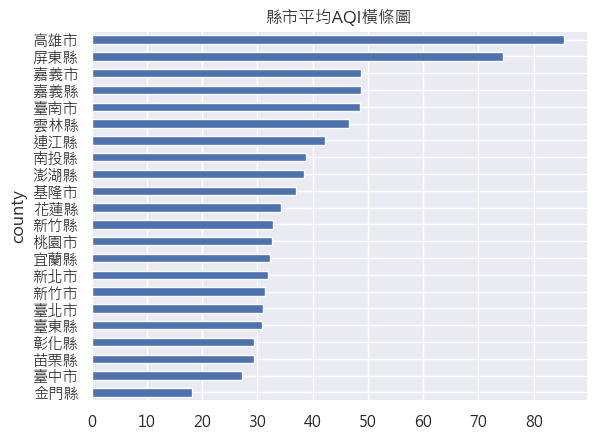

In [29]:
# 縣市平均AQI橫條圖
# 最大值前3名為高雄市、屏東縣、嘉義縣
# 最小值後3名為苗栗縣、臺中市、金門縣
aqi_mean.plot.barh(x='AQI', title='縣市平均AQI橫條圖')
plt.show()

# 3.資料準備

+ 資料準備主要工作是針對監督式學習將資料隨機區分為二大類：訓練集（train dataset）與測試集（test dataset）為主。
+ 本研究是非監督式學習，因此資料可以先不用區分成二大類別。

# 4.建立模型

# 4.1 K-means集群法

建立模型方法包括推論統計、機器學習、深度學習與生成式學習等方法。本研究使用非監督式學習 K-means集群法。

**K-means集群法**

K-means 是一種迭代集群演算法，用於將 n 個數據點劃分為 k 個聚集。

演算法的目標是最小化同一集群內所有資料點與該集群中心點之距離平方。

+ 由於初始集群中心的隨機性，演算法可能收斂到不同的解。

+ 集群內(inner)距離平方和將達到最小值，集群間(between)距離平和將達到最大值。

K-means集群法流程：

1.初始化集群中心：首先隨機選擇K個數據點作為初始集群中心點。

2.分配樣本到最近的集群中心：對於每個樣本，計算與每個集群中心的距離，將樣本分配到距離最近的集群中心所對應的集群。(第1次迭代)

3.更新集群中心：對每個集群，計算其所有樣本的平均值，將平均值作為新的集群中心。(第2次迭代, 第3次迭代….)

4.重複步驟2和步驟3：重複執行步驟2和步驟3，直到集群心不再變化或達到預定的迭代次數。

5.結果：最終的集群中心即為集群結果，每個樣本被分配到對應的一個集群。

# K-means 集群法示範

<img src='https://github.com/rwepa/r_data_scientist/blob/main/r_kmeans_animation.gif?raw=true' alt='kmeans' width='500'>

R程式碼: https://github.com/rwepa/r_data_scientist/blob/main/r_kmeans_animation.R

評估模型集群個數的方法包括:

1. 陡坡圖（Scree plot）
2. 側影係數（Silhouette coefficient）

# 4.2 方法1 陡坡圖(Scree plot)

1. 繪製陡坡圖並找出降低趨緩最明顯之K值為集群數。陡坡圖的X軸為集群數，陡坡圖的Y軸為群內距離平方和(Within-cluster sum of squares，WCSS)。

2. 群內距離平方和。又稱為SSE(Sum of square errors within clusters)。

3. 使用群內距離平方和繪製陡坡圖又稱為手肘法(Elbow method)。

In [30]:
# 進行資料轉換為 [0, 1]並儲存為 X_scaled
scaler = MinMaxScaler()
X = df_numerics
X_scaled =  pd.DataFrame(scaler.fit_transform(X))
X_scaled.columns = X.columns
X_scaled.describe()

aqi     so2      co      o3  o3_8hr    pm10   pm2.5     no2     nox  \
count  830.00  830.00  830.00  830.00  830.00  830.00  830.00  830.00  830.00   
mean     0.28    0.12    0.20    0.29    0.44    0.08    0.17    0.27    0.24   
std      0.23    0.10    0.16    0.13    0.16    0.10    0.18    0.18    0.17   
min      0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00   
25%      0.13    0.07    0.10    0.20    0.35    0.02    0.04    0.15    0.13   
50%      0.17    0.11    0.15    0.26    0.45    0.05    0.09    0.24    0.20   
75%      0.33    0.15    0.25    0.34    0.54    0.12    0.23    0.37    0.30   
max      1.00    1.00    1.00    1.00    1.00    1.00    1.00    1.00    1.00   

           no  windspeed  winddirec  co_8hr  pm2.5_avg  pm10_avg  so2_avg  \
count  830.00     830.00     830.00  830.00     830.00    830.00   830.00   
mean     0.11       0.30       0.41    0.21       0.24      0.14     0.23   
std      0.12       0.21       0.37    0.21       0.25      0.14     0.23   
min      0.00       0.00       0.00    0.00       0.00      0.00     0.00   
25%      0.05       0.15       0.09    0.00       0.07      0.03     0.00   
50%      0.08       0.23       0.21    0.17       0.12      0.09     0.33   
75%      0.13       0.37       0.83    0.33       0.34      0.22     0.33   
max      1.00       1.00       1.00    1.00       1.00      1.00     1.00   

       longitude  latitude  
count     830.00    830.00  
mean        0.71      0.48  
std         0.18      0.24  
min         0.00      0.00  
25%         0.58      0.25  
50%         0.67      0.50  
75%         0.87      0.71  
max         1.00      1.00

In [31]:
# 計算群內距離平方和(WCSS)

# 以下 UserWarning 已經不再顯示
# UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. 
# You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
wcss = []
max_loop=30

for k in range(2, max_loop):
    k_means = KMeans(n_clusters=k, random_state = 0)
    k_means.fit(X_scaled)
    wcss.append(k_means.inertia_)

In [32]:
# 列印群內距離平方和(WCSS)
print(wcss)

[351.98700445856866, 274.21336741986687, 255.0870963025578, 207.66278511109002, 188.40019858215408, 175.90020693024877, 162.13990850075353, 155.99900030191628, 146.8137066863274, 136.39112018912368, 129.0878117182223, 124.11875770123936, 115.61668168682024, 111.52664765371608, 107.98567365656129, 101.99874093419794, 99.10032057584604, 96.54439141287791, 90.94561124607758, 92.01247169019058, 88.02432622232027, 86.4479912960884, 83.2715898986996, 78.70072781596156, 77.47664572371019, 73.9839643658044, 72.25516610937166, 67.7595005019246]


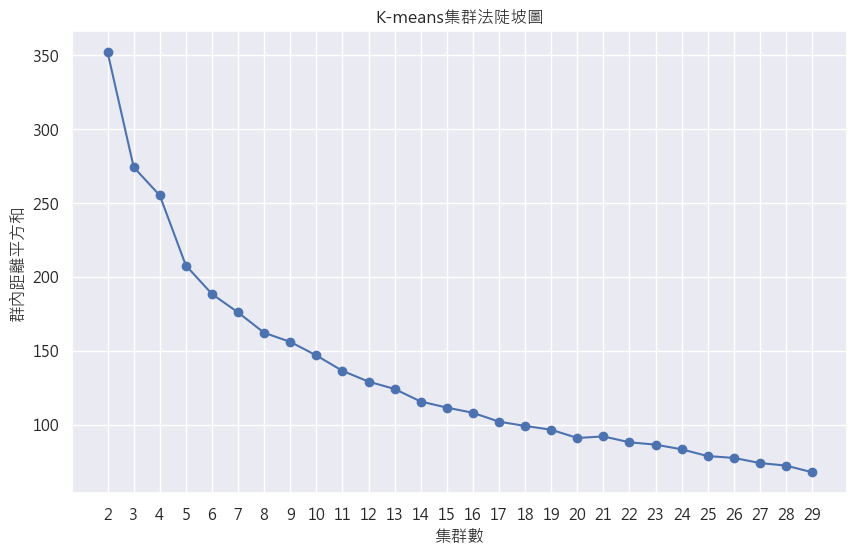

In [33]:
# 群內距離平方和陡坡圖
fig = plt.figure(figsize=(10, 6))
plt.plot(range(2, max_loop), wcss, marker = 'o')
plt.xticks([i for i in range(2, max_loop)])
plt.xlabel("集群數")
plt.ylabel("群內距離平方和")
plt.title("K-means集群法陡坡圖")
plt.grid(True)

# 4.3 方法2 使用側影係數(Silhouette coefficient)

- 側影係數又稱為輪廓分數（Silhouette Score）。
- 在機器學習與數據挖掘領域，輪廓指的是一種反映數據聚類結果一致性的方法。
- 側影係數衡量一個點與它自己的集群（凝聚力）相比於其他集群（分離）的相似程度。
- 側影係數廓值的範圍在 1 到 –1 之側影係數越高，表示該點越適合在該集群之中。
- 如果側影係數的輪值廓大部分是負值，則可能是建立了太多或太少的集群。


參考資料: https://en.wikipedia.org/wiki/Silhouette_(clustering)

步驟1 計算集群內平均距離 $a(i)$。

步驟2 計算最鄰近集群間平均距離 $b(i)$。

步驟3 計算每個資料點$i$側影係數：

$s(i)={\frac {b(i)-a(i)}{\max\{a(i),b(i)\}}}$

上式可以以改寫為：
$s(i)={\begin{cases}1-a(i)/b(i),&{\mbox{if }}a(i)<b(i)\\0,&{\mbox{if }}a(i)=b(i)\\b(i)/a(i)-1,&{\mbox{if }}a(i)>b(i)\\\end{cases}}$ 且 $-1\leq s(i)\leq 1$

In [34]:
# 使用 metrics.silhouette_score 函數計算側影係數
silhouette_score = []
for k in range(2, max_loop):
        kmeans = KMeans(n_clusters=k, random_state=10, n_init=10)
        kmeans.fit(X_scaled)        
        silhouette_score.append(metrics.silhouette_score(X_scaled, kmeans.labels_, random_state=10))

In [35]:
# 列印側影係數
print(silhouette_score)

[0.38401183979869646, 0.3492007853444987, 0.30528249103140503, 0.29455744084256624, 0.2844506346494386, 0.26840458319033333, 0.2482543848037733, 0.2531019883760993, 0.26810401626793967, 0.275261624136274, 0.2620301562251812, 0.3011412840682474, 0.27205827778334707, 0.2791559369161598, 0.27360325002121316, 0.3011431958757774, 0.28533317063193814, 0.3089339566949135, 0.31320012218026333, 0.3119841582267369, 0.30131824065151935, 0.3106510909104, 0.29847938668648477, 0.3270805005567484, 0.3165369413252563, 0.338748384367636, 0.3297211933592091, 0.34321116406145463]


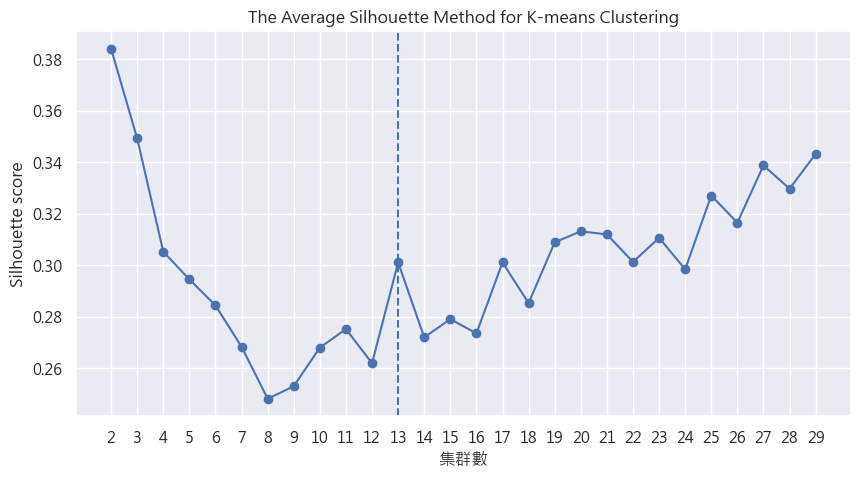

In [36]:
# 側影係數圖
# 結果考慮 K=13
fig = plt.figure(figsize=(10, 5))
plt.plot(range(2, max_loop), silhouette_score, marker = 'o')
plt.axvline(x = 13, color = 'b', linestyle='--')
plt.xticks([i for i in range(2, max_loop)])
plt.xlabel("集群數")
plt.ylabel("Silhouette score")
plt.title("The Average Silhouette Method for K-means Clustering")
plt.grid(True)

# 4.4 K-means集群預測

In [37]:
# 設定集群數
nclust=13

In [38]:
# 建立 k-means集群法且 K=13
k_means = cluster.KMeans(n_clusters=nclust)
k_means.fit(X_scaled)

KMeans(n_clusters=13)

In [39]:
# 預測分群結果, 使用 predict 函數
# target_labels 結果為13集群, 即 [0,1,2,...,12]

target_labels = k_means.predict(X_scaled)
df_cluster = pd.DataFrame.from_dict({'cluster': target_labels})
df_cluster

cluster
0          4
1          5
2          1
3          4
4          8
..       ...
825        3
826        3
827        5
828        3
829        5

[830 rows x 1 columns]

In [40]:
# 合併 df_sitename, df_cluster
df_cluster = pd.concat([df, df_cluster], axis=1, ignore_index=False)
df_cluster # 830*23

sitename county   aqi status  so2    co    o3  o3_8hr  pm10  pm2.5  ...  \
0     屏東(枋山)    屏東縣  79.0     普通  1.4  0.32  82.5    62.0  62.0   31.0  ...   
1     宜蘭（頭城）    宜蘭縣  34.0     良好  0.0  0.14  38.0    37.9   7.0    0.0  ...   
2     新北(樹林)    新北市  35.0     良好  0.5  0.33  19.8    21.9  12.0    3.0  ...   
3     屏東（琉球）    屏東縣  93.0     普通  1.2  0.34  71.3    47.7  63.0   28.0  ...   
4     臺南（麻豆）    臺南市  55.0     普通  1.1  0.22  43.0    34.6  99.0   12.0  ...   
..       ...    ...   ...    ...  ...   ...   ...     ...   ...    ...  ...   
825       頭份    苗栗縣  32.0     良好  1.0  0.19  32.3    35.0   6.0    1.0  ...   
826       新竹    新竹市  33.0     良好  1.1  0.21  30.5    36.0   6.0    1.0  ...   
827       竹東    新竹縣  35.0     良好  0.5  0.15  36.0    38.3   4.0    2.0  ...   
828       湖口    新竹縣  34.0     良好  0.7  0.18  35.4    37.4   9.0    3.0  ...   
829       龍潭    桃園市  31.0     良好  0.7  0.22  29.7    34.6   7.0    3.0  ...   

     windspeed  winddirec  datacreationdate  co_8hr  pm2.5_avg pm10_avg  \
0          1.0      320.0  2024-11-21 16:00     0.3       26.7     53.0   
1          1.2       53.0  2024-11-21 16:00     0.1        0.9      4.0   
2          0.0      162.0  2024-11-21 16:00     0.2        2.7      7.0   
3          2.9      319.0  2024-11-21 16:00     0.4       32.6     63.0   
4          3.0        2.0  2024-11-21 16:00     0.2       13.2     55.0   
..         ...        ...               ...     ...        ...      ...   
825        3.4       36.0  2024-11-21 11:00     0.1        3.2      7.0   
826        3.3       37.0  2024-11-21 11:00     0.1        2.1      7.0   
827        6.3       37.0  2024-11-21 11:00     0.1        1.0      3.0   
828        6.3       47.0  2024-11-21 11:00     0.1        3.4      7.0   
829        4.4       56.0  2024-11-21 11:00     0.1        3.1      5.0   

     so2_avg  longitude  latitude  cluster  
0        0.0     120.65     22.26        4  
1        0.0     121.82     24.85        5  
2        0.0     121.38     24.95        1  
3        1.0     120.38     22.35        4  
4        0.0     120.25     23.18        8  
..       ...        ...       ...      ...  
825      1.0     120.90     24.70        3  
826      1.0     120.97     24.81        3  
827      0.0     121.09     24.74        5  
828      1.0     121.04     24.90        3  
829      0.0     121.22     24.86        5  

[830 rows x 23 columns]

In [41]:
# 新增集群對應的顏色

colors = {
0:'yellow', 
1:'lightblue', 
2:'gray', 
3:'blue', 
4:'darkred', 
5:'lightgreen',
6:'purple', 
7:'red', 
8:'green', 
9:'cadetblue',
10:'orange', 
11:'pink', 
12:'lightgray'}

df_cluster['color'] = df_cluster['cluster'].map(colors)
df_cluster

sitename county   aqi status  so2    co    o3  o3_8hr  pm10  pm2.5  ...  \
0     屏東(枋山)    屏東縣  79.0     普通  1.4  0.32  82.5    62.0  62.0   31.0  ...   
1     宜蘭（頭城）    宜蘭縣  34.0     良好  0.0  0.14  38.0    37.9   7.0    0.0  ...   
2     新北(樹林)    新北市  35.0     良好  0.5  0.33  19.8    21.9  12.0    3.0  ...   
3     屏東（琉球）    屏東縣  93.0     普通  1.2  0.34  71.3    47.7  63.0   28.0  ...   
4     臺南（麻豆）    臺南市  55.0     普通  1.1  0.22  43.0    34.6  99.0   12.0  ...   
..       ...    ...   ...    ...  ...   ...   ...     ...   ...    ...  ...   
825       頭份    苗栗縣  32.0     良好  1.0  0.19  32.3    35.0   6.0    1.0  ...   
826       新竹    新竹市  33.0     良好  1.1  0.21  30.5    36.0   6.0    1.0  ...   
827       竹東    新竹縣  35.0     良好  0.5  0.15  36.0    38.3   4.0    2.0  ...   
828       湖口    新竹縣  34.0     良好  0.7  0.18  35.4    37.4   9.0    3.0  ...   
829       龍潭    桃園市  31.0     良好  0.7  0.22  29.7    34.6   7.0    3.0  ...   

     winddirec  datacreationdate  co_8hr  pm2.5_avg  pm10_avg so2_avg  \
0        320.0  2024-11-21 16:00     0.3       26.7      53.0     0.0   
1         53.0  2024-11-21 16:00     0.1        0.9       4.0     0.0   
2        162.0  2024-11-21 16:00     0.2        2.7       7.0     0.0   
3        319.0  2024-11-21 16:00     0.4       32.6      63.0     1.0   
4          2.0  2024-11-21 16:00     0.2       13.2      55.0     0.0   
..         ...               ...     ...        ...       ...     ...   
825       36.0  2024-11-21 11:00     0.1        3.2       7.0     1.0   
826       37.0  2024-11-21 11:00     0.1        2.1       7.0     1.0   
827       37.0  2024-11-21 11:00     0.1        1.0       3.0     0.0   
828       47.0  2024-11-21 11:00     0.1        3.4       7.0     1.0   
829       56.0  2024-11-21 11:00     0.1        3.1       5.0     0.0   

     longitude  latitude  cluster       color  
0       120.65     22.26        4     darkred  
1       121.82     24.85        5  lightgreen  
2       121.38     24.95        1   lightblue  
3       120.38     22.35        4     darkred  
4       120.25     23.18        8       green  
..         ...       ...      ...         ...  
825     120.90     24.70        3        blue  
826     120.97     24.81        3        blue  
827     121.09     24.74        5  lightgreen  
828     121.04     24.90        3        blue  
829     121.22     24.86        5  lightgreen  

[830 rows x 24 columns]

# 5.模型評估與測試

本研究為非監督式學習無測試集資料，暫不測試。以下將針對集群法預測結果進行地理資料視覺化。

**folium模組**

+ folium 官網: https://python-visualization.github.io/folium/

+ folium 特性:
1. folium 是 Python 地理視覺化模組
2. 提供互動式的地圖操作介面
3. 採用 leaflet JavaScript 函式庫, 操作與R類似
4. folium 地圖服務結合 OpenStreetMap, Mapbox, and Stamen 等客製化功能

+ 安裝 folium 模組, 推薦使用方法1.

    + 方法1</br>pip install folium

    + 方法2</br>conda install -c conda-forge folium 

+ pip install folium 安裝畫面

<img src="https://github.com/rwepa/python_data_scientist/blob/main/tutorial_air_quality_index/install_folium.png?raw=true" alt="install_folium" width="800">

+ 使用 Spyder 可以配合 webbrwoser 開啟瀏覽器, Anaconda 已安裝 webbrwoser 模組.

+ Jupyter-notebook 無須使用 webbrwoser 模組, 可以直接顯示.

+ webbrowser 可以直接開啟網頁

In [42]:
# 測試使用 webbrowser 開啟網頁
import webbrowser
webbrowser.open_new_tab('http://rwepa.blogspot.com/')

True

In [43]:
# 設定地圖的啟始檢視位置
m = folium.Map(location=[23.97565, 120.9738819], zoom_start=8)

for index, row in df_cluster.iterrows():

    # 將資料點使用圓形標記加在地圖上
    folium.CircleMarker(
        radius=10,                                     # 半徑
        location=[row["latitude"], row["longitude"]],  # 位置
        color = row["color"],                          # 顏色
        stroke=False,                                  # 是否顯示框線
        fill=True,                                     # 是否填滿        
        fill_opacity=0.1,                              # 設定透明度: 1=完全不透明, 0.1=完全透明
        popup  ="測站: {} \n AQI: {} \n 集群: {}".format(row["sitename"], row["aqi"] , row["cluster"]),
        tooltip="測站: {} \n AQI: {} \n 集群: {}".format(row["sitename"], row["aqi"] , row["cluster"]),
    ).add_to(m)

# icon list: https://fontawesome.com/icons

# 加入置中標題
titles = 'AQI地理視覺化系統-2024.11.26-@RWPEA'
title_html = '''
             <h3 align="center" style="font-size:16px"><b>{}</b></h3>
             '''.format(titles)   

m.get_root().html.add_child(folium.Element(title_html))

# 加入圖例 HTML
legend_html = '''
<div style="position: fixed; 
     bottom: 150px; left: 50px; width: 100px; height: 250px; 
     border:1px solid grey; z-index:9999; font-size:12px;
     background-color:white; opacity: 1.0;">
     &nbsp; <b>AQI Clusters</b> <br>
     &nbsp; 0 &nbsp; <i class="fa fa-circle" style="color:yellow"></i><br>
     &nbsp; 1 &nbsp; <i class="fa fa-circle" style="color:lightblue"></i><br>
     &nbsp; 2 &nbsp; <i class="fa fa-circle" style="color:gray"></i><br>
     &nbsp; 3 &nbsp; <i class="fa fa-circle" style="color:blue"></i><br>
     &nbsp; 4 &nbsp; <i class="fa fa-circle" style="color:darkred"></i><br>
     &nbsp; 5 &nbsp; <i class="fa fa-circle" style="color:lightgreen"></i><br>
     &nbsp; 6 &nbsp; <i class="fa fa-circle" style="color:purple"></i><br>
     &nbsp; 7 &nbsp; <i class="fa fa-circle" style="color:red"></i><br>
     &nbsp; 8 &nbsp; <i class="fa fa-circle" style="color:green"></i><br>
     &nbsp; 9 &nbsp; <i class="fa fa-circle" style="color:cadetblue"></i><br>
     &nbsp; 10 &nbsp; <i class="fa fa-circle" style="color:orange"></i><br>
     &nbsp; 11 &nbsp; <i class="fa fa-circle" style="color:pink"></i><br>
     &nbsp; 12 &nbsp; <i class="fa fa-circle" style="color:lightgray"></i><br>
</div>
'''

# 加入圖例於地圖上
m.get_root().html.add_child(folium.Element(legend_html))

# AQI地理視覺化系操作

https://github.com/rwepa/python_data_scientist/blob/main/tutorial_air_quality_index/aqi_folium_demo.gif

<img src='https://github.com/rwepa/python_data_scientist/blob/main/tutorial_air_quality_index/aqi_folium_demo.gif?raw=true' alt='aqi_folium_demo'>

In [44]:
# Jupyter notebook 顯示結果
m

**思考題**

上述K-means集群演算法視覺化結果, 是否有哪些測站集群有明顯不同或錯誤?

# 6.佈署應用與結論

**6.1 結論**

1. 本研究已經完成非監督式學習建立 AQI K-means 集群模型以做為決策參考。

2. 研究變數包括"測站名稱"等25個變數。

3. 本研究已經完成AQI地理視覺化系統以供決策參考。

**6.2 未來研究**

未來研究主題可加入以下三個相關演算法:

1. 機器學習 (Machine Learning): https://en.wikipedia.org/wiki/Machine_learning

2. 深度學習應用 (Deep Learning): https://en.wikipedia.org/wiki/Deep_learning

3. 歷年監測資料: https://airtw.moenv.gov.tw/CHT/Query/His_Data.aspx

4. 整合至 Streamlit 網頁應用: https://www.youtube.com/watch?v=-_zghs2qrIg

# 參考文獻

1. Ming-Chang, Lee. (2024). RWEPA網站. https://rwepa.blogspot.com. Last accessed on October 10, 2024.
2. Python 3.13.0 Reference Documentation. (2024). https://docs.python.org/3/. Last accessed on October 10, 2024.
3. Mahsa Ashouri, Frederick Kin Hing Phoa, Chun-Houh Chen2, Galit Shmueli. , An Interactive Clustering-Based Visualization Tool for Air Quality Data Analysis. Aerosol and Air Quality Research. Volume 23, Issue 12, December 2023. URL: https://doi.org/10.4209/aaqr.230124

In [45]:
# end